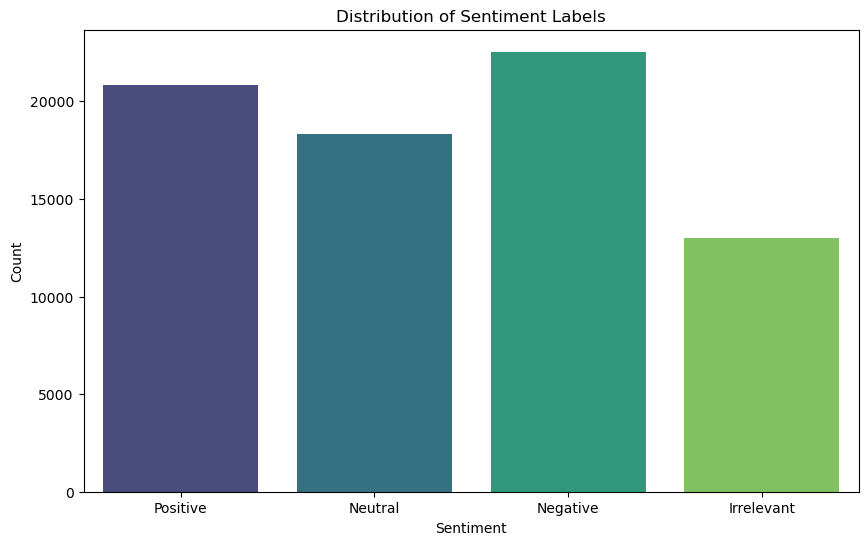

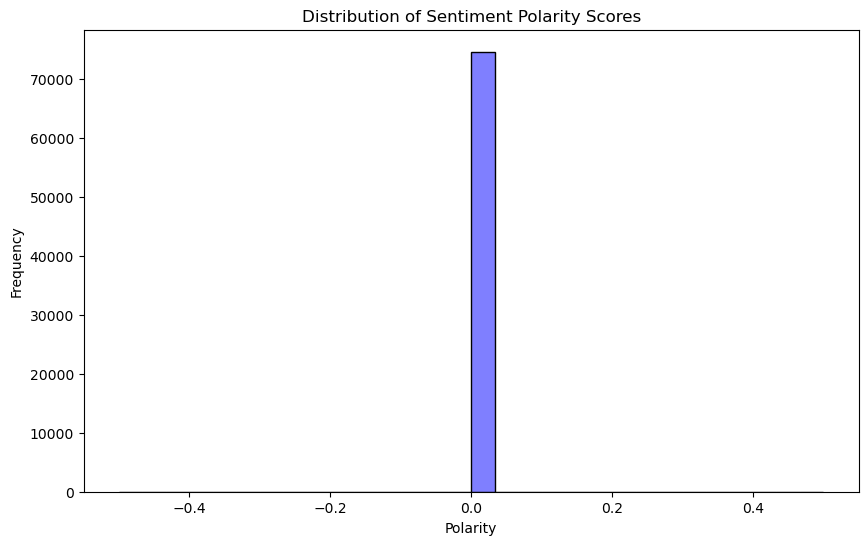

Word Cloud for Positive Sentiment:


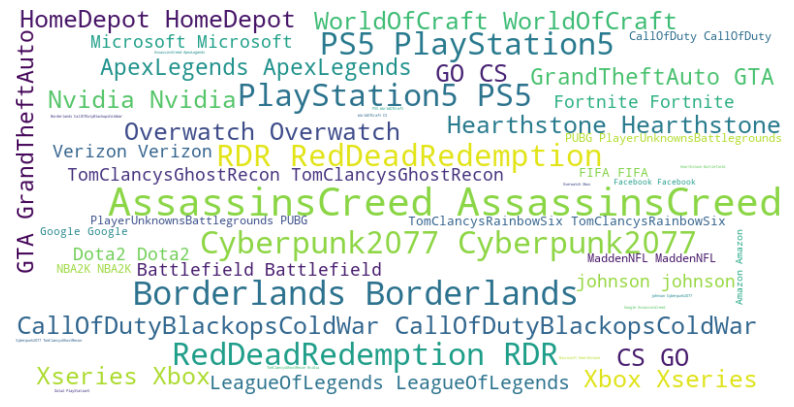

Word Cloud for Negative Sentiment:


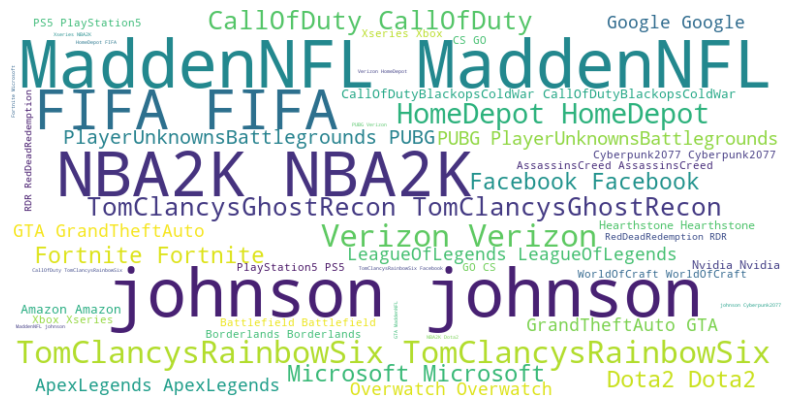

Word Cloud for Neutral Sentiment:


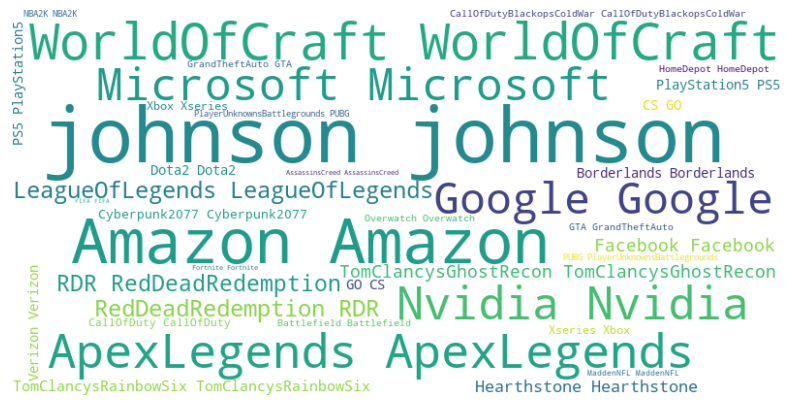

Word Cloud for Irrelevant Sentiment:


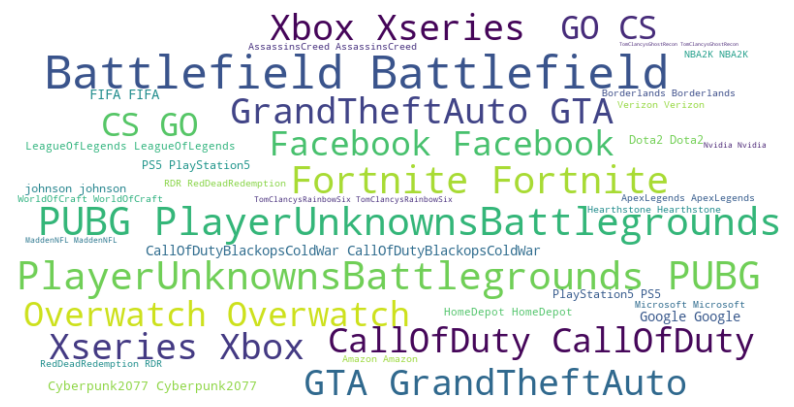

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('twitter_training.csv')

# Assign column names based on inspection
text_column = 'Borderlands'  # Column with the text of the tweet
sentiment_column = 'Positive'  # Column with sentiment labels

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['polarity'] = df[text_column].apply(analyze_sentiment)

# Map sentiment labels to numerical values for plotting
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0, 'Irrelevant': 0}  # Adjust if needed
df['sentiment_numeric'] = df[sentiment_column].map(sentiment_map)

# Visualization: Distribution of Sentiment Labels
plt.figure(figsize=(10, 6))
sns.countplot(x=sentiment_column, data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization: Distribution of Sentiment Polarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Generate and display word clouds for each sentiment category
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
for sentiment in ['Positive', 'Negative', 'Neutral', 'Irrelevant']:
    text = df[df[sentiment_column] == sentiment][text_column]
    print(f"Word Cloud for {sentiment} Sentiment:")
    generate_wordcloud(text)